In [ ]:
###GÖZETİMLİ ÖĞRENME İLE MANTARLAR ZEHRİRLİ Mİ DEGİL Mİ 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve,auc

)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [71]:
# CSV(Data seti) dosyasını oku
df = pd.read_csv("secondary_data_generated.csv",delimiter = ';')

In [72]:
# Veri ön incelemesi
print("Veri Setinin Boyutu(satır,sütun):",df.shape)
print("Veri setinin ilk 5 satırı:")
print(df.head())
print("\n Veri seti bilgisi:")
df.info()


Veri Setinin Boyutu(satır,sütun): (61069, 21)
Veri setinin ilk 5 satırı:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surfac

In [73]:
### Eksik veri analizi ve temzilği 

# Null değerlerin olup olmadığını kontrol edelim
null_counts = df.isnull().sum()
print("Null Değerlerin Sayısı:")
print(null_counts)

# Toplam satır(gözlem) sayısı
total_rows = len(df)

# %50'den fazla eksik olan sütunları tespit et
cols_to_drop = null_counts[null_counts > total_rows * 0.5].index

# Bu sütunları veri setinden çıkar(çok eksik veri içerdiği için analizde kullanılmaz)
df_cleaned = df.drop(columns=cols_to_drop)

# Geriye kalan sütunlardaki eksik değerleri mod (en sık görülen değer) ile doldur
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Son kontrol
print("Temizlenmiş veri seti boyutu:", df_cleaned.shape)
print("Eksik değerlerin sayısı (temizlendikten sonra):\n", df_cleaned.isnull().sum())


Null Değerlerin Sayısı:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64
Temizlenmiş veri seti boyutu: (61069, 16)
Eksik değerlerin sayısı (temizlendikten sonra):
 class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-hei

In [76]:
# VERİ ÖN İŞLEME

# 'class' sütunu hedef değişken olduğundan onu ayırıyoruz
# X -> Bağımsız değişkenler (özellikler), y -> Bağımlı değişken (hedef)X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

# Kategorik değişkenleri sayısallaştır
# One-hot encoding ile her kategorik sütun için ayrı sütunlar oluşturulur (0 ve 1 ile temsil edilir)
X = pd.get_dummies(X)  #One-hot encodinh:özellikler için

# 'e' (edible) ve 'p' (poisonous) sınıfları 0 ve 1 olarak etiketlenir

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # e=0, p=1 

# Veriyi ölçeklendir(ortalama=0, standart sapma=1 olacak şekilde)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# EĞİTİM VE TEST VERİLERİNİ AYIR

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Logistic Regression Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      5374
           1       0.80      0.79      0.80      6840

    accuracy                           0.77     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.77      0.77      0.77     12214



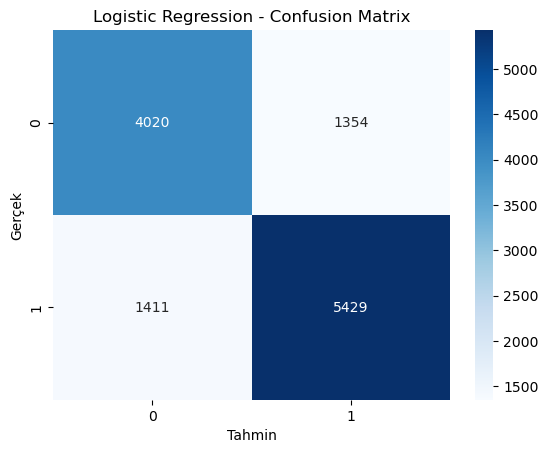

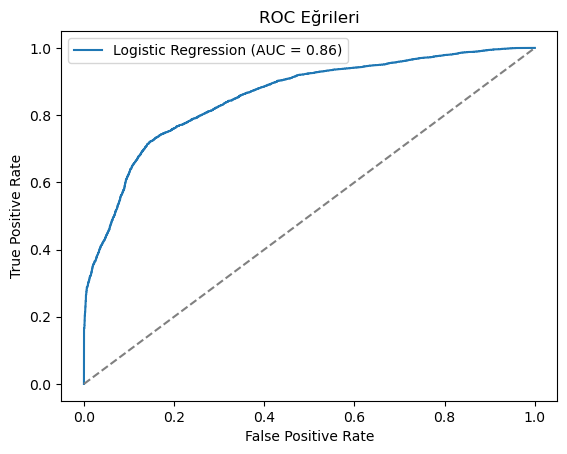


Random Forest Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



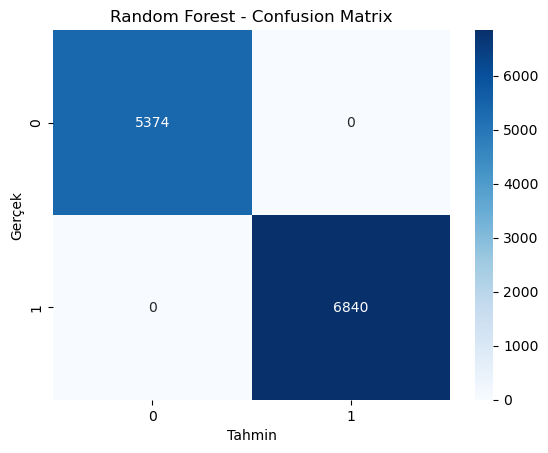

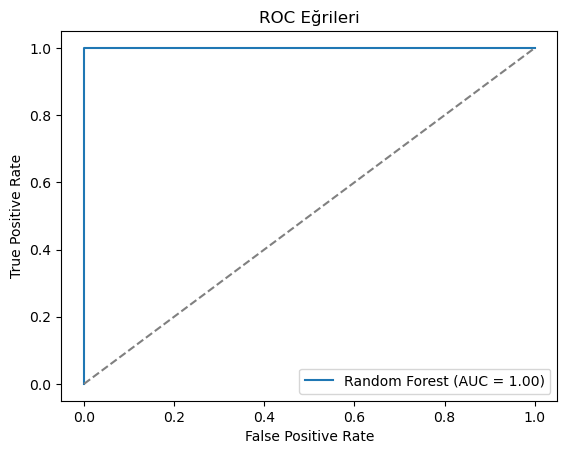


KNN Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



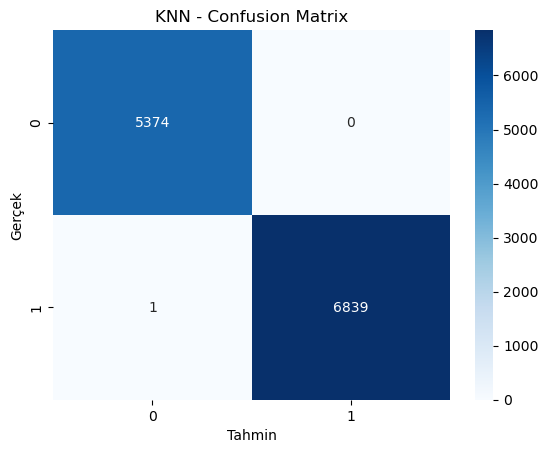

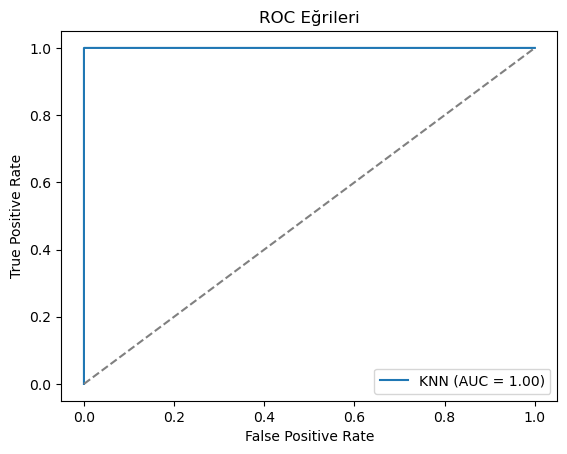

In [78]:
# MODELLERİ TANIMLA

# Kullanılacak sınıflandırma modellerini bir sözlükte tanımlıyoruz

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = [] # Her modelin sonuçlarını saklamak için boş liste

# MODELLERİ EĞİT - TEST ET - METRİKLERİ HESAPLA
for name, model in models.items():
    try:
           # Modeli eğitim verisiyle eğit
        model.fit(X_train, y_train)
          # Test verisi üzerinde tahmin yap
        y_pred = model.predict(X_test)
          # ROC eğrisi için olasılık tahminlerini al
        y_prob = model.predict_proba(X_test)[:, 1]
        
            # Sınıflandırma performans raporunu yazdır
        print(f"\n{name} Sınıflandırma Raporu:")
        print(classification_report(y_test, y_pred))

        
           # Confusion matrix oluştur ve görselleştir
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel('Tahmin')
        plt.ylabel('Gerçek')
        plt.show()

        
        # ROC eğrisi için gerekli değerleri hesapla
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr) # AUC (Area Under Curve) değeri hesapla
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

        # Modelin doğruluk ve AUC değerlerini sakla
        results.append({
            'Model': name,
            'Accuracy': model.score(X_test, y_test), # Test verisindeki doğruluk
            'AUC': roc_auc                           # ROC eğrisi altındaki alan
        })
        
        # ROC eğrisi çizimi
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title('ROC Eğrileri')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    except Exception as e:        # Model çalıştırılırken bir hata olursa yakala ve yazdır
        print(f"{name} modeli çalıştırılırken hata oluştu: {e}")


In [79]:
###En iyi Hangi model çalışıyor 
# Daha önce elde edilen model sonuçlarını (Accuracy ve AUC içeren) bir DataFrame dönüştürüyoruz
results_df = pd.DataFrame(results)
# AUC değeri en yüksek olan modeli bul (ROC eğrisi altındaki alan en büyük olan model)
best_model_row = results_df.loc[results_df['AUC'].idxmax()]
print("En iyi model:\n", best_model_row)

# En iyi modelin adını al
best_model_name = best_model_row['Model']
best_model = models[best_model_name]  # ← BU SATIR OLMADAN grid_search çalışmaz çünkü grid_search için eğitilecek bir model nesnesi gerekir

En iyi model:
 Model       Random Forest
Accuracy              1.0
AUC                   1.0
Name: 1, dtype: object


C:\Users\aysen\AppData\Local\Temp\ipykernel_6580\3662431915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='tab10', order=model_order)


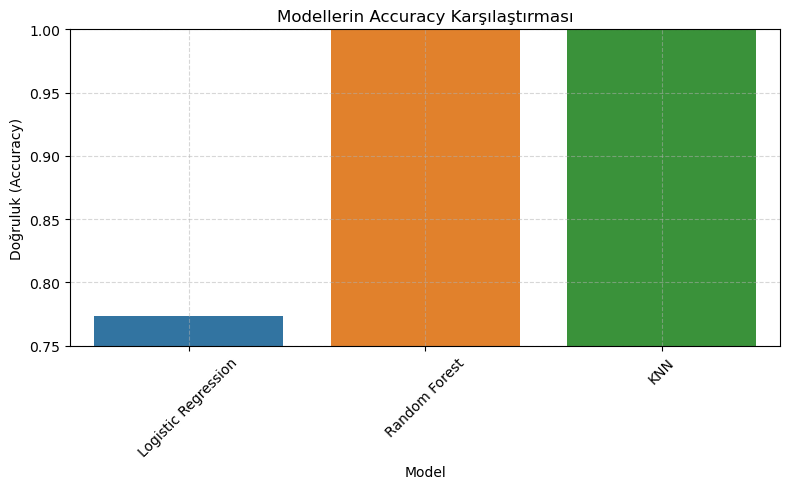

In [80]:
# Modellerin adlarını sıralı bir liste olarak al (çubuk grafik sıralaması için)
model_order = results_df['Model'].tolist()

# Grafik boyutunu ayarla
plt.figure(figsize=(8, 5))

# Modellerin doğruluk (accuracy) skorlarını barplot ile görselleştir
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='tab10', order=model_order)
plt.title('Modellerin Accuracy Karşılaştırması')
plt.ylim(0.75, 1)                                        # Y-eksenini sınırla
plt.ylabel('Doğruluk (Accuracy)')                         # Y ekseni etiketi
plt.xticks(rotation=45)# X ekseni yazılarını 45 derece döndür okunabilirlik için yaptık bu kısmı
plt.grid(True, linestyle='--', alpha=0.5)# Arka plan çizgileri
plt.tight_layout()   # Elemanların birbirine girmesini engelle
plt.show()       # Grafiği ekrana çiz


In [81]:
print(results_df)
# Bu sonuçları 'supervised_results.csv' adlı bir CSV dosyasına kaydet 
results_df.to_csv('supervised_results.csv', index=False)

                 Model  Accuracy       AUC
0  Logistic Regression  0.773620  0.855241
1        Random Forest  1.000000  1.000000
2                  KNN  0.999918  1.000000


In [84]:
# Çapraz doğrulama sonuçlarını saklamak için boş bir liste oluştur
cv_results = []

print("\n--- 5-Fold Çapraz Doğrulama Sonuçları ---")
# Her bir modeli sırayla değerlendir
for name, model in models.items():
     # 5 katlı çapraz doğrulama ile doğruluk (accuracy) skorlarını hesapla
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    mean_score = scores.mean() #ortalama 
    std_score = scores.std()   # standart sapma 
    
    print(f"{name} - Ortalama Accuracy: {mean_score:.4f} | Std Sapma: {std_score:.4f}")
    
    cv_results.append({
        'Model': name,
        'CV Mean Accuracy': mean_score,
        'Std Dev': std_score, 
        'CV Min': scores.min(), #min doğruluk
        'CV Max': scores.max()  #max doğruluk
    })

# DataFrame oluştur ve ort azalan şekilde sırala
cv_df = pd.DataFrame(cv_results).sort_values(by='CV Mean Accuracy', ascending=False)

print("\nÇapraz Doğrulama Sonuç Tablosu:")
print(cv_df)




--- 5-Fold Çapraz Doğrulama Sonuçları ---
Logistic Regression - Ortalama Accuracy: 0.5584 | Std Sapma: 0.0912
Random Forest - Ortalama Accuracy: 0.5770 | Std Sapma: 0.1128
KNN - Ortalama Accuracy: 0.5129 | Std Sapma: 0.0447

Çapraz Doğrulama Sonuç Tablosu:
                 Model  CV Mean Accuracy   Std Dev    CV Min    CV Max
1        Random Forest          0.577022  0.112830  0.416489  0.745353
0  Logistic Regression          0.558386  0.091216  0.430571  0.651273
2                  KNN          0.512863  0.044701  0.463812  0.585394


C:\Users\aysen\AppData\Local\Temp\ipykernel_6580\702438096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='CV Mean Accuracy', data=cv_df, palette='magma')


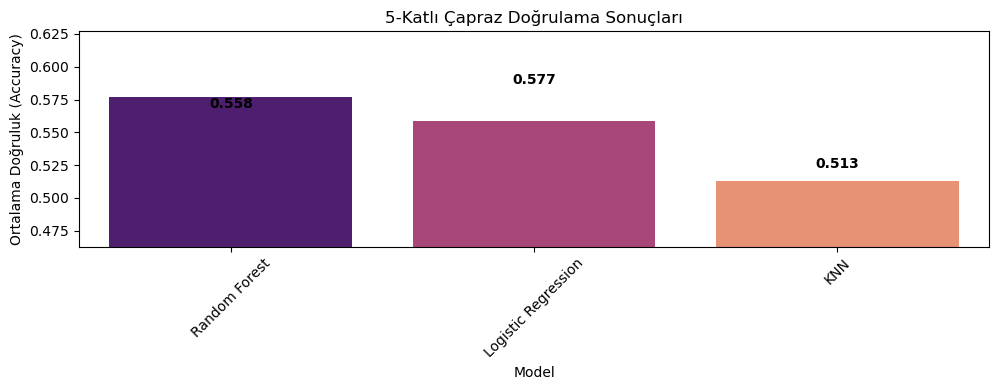

In [85]:

plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='CV Mean Accuracy', data=cv_df, palette='magma')

# Y eksenini, minimum ve maksimum doğruluk skorlarına göre dinamik olarak ayarla
plt.ylim(cv_df['CV Mean Accuracy'].min() - 0.05, cv_df['CV Mean Accuracy'].max() + 0.05)

# Başlık ve eksen etiketlerini belirle
plt.title('5-Katlı Çapraz Doğrulama Sonuçları')
plt.ylabel('Ortalama Doğruluk (Accuracy)')
plt.xticks(rotation=45)

# Her barın üstüne değer yaz
for index, row in cv_df.iterrows():
    plt.text(index, row['CV Mean Accuracy'] + 0.01, f"{row['CV Mean Accuracy']:.3f}", 
             color='black', ha="center", weight='bold')
    
# Grafik öğelerinin taşmaması için yerleşimi sıkıştır
plt.tight_layout()

plt.show()
